In [1]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Optional: progress bar
try:
    from tqdm.auto import tqdm
except ImportError:
    tqdm = None
    print("tqdm not installed, continuing without progress bars.")

# Base paths (relative to /notebooks)
PROJECT_ROOT = Path("..").resolve()
DATA_RAW = PROJECT_ROOT / "data" / "raw"

TRACKS_FEATURES_PATH      = DATA_RAW / "tracks_features.csv"
SPOTIFY_DATA_PATH         = DATA_RAW / "spotify_data.csv"
SPOTIFY_2023_PATH         = DATA_RAW / "spotify_features_data_2023.csv"
TRACKS_PATH               = DATA_RAW / "tracks.csv"
PATH_278K                 = DATA_RAW / "278k_labelled_uri.csv"
DATA_PATH                 = DATA_RAW / "data.csv"
RAW_SONGS_PATH            = DATA_RAW / "raw songs dataset.csv"
APRIL_2019_PATH           = DATA_RAW / "SpotifyAudioFeaturesApril2019.csv"
MPD_DIR                   = DATA_RAW / "mpd"

(
    TRACKS_FEATURES_PATH,
    SPOTIFY_DATA_PATH,
    SPOTIFY_2023_PATH,
    TRACKS_PATH,
    PATH_278K,
    DATA_PATH,
    RAW_SONGS_PATH,
    APRIL_2019_PATH,
    MPD_DIR,
)


c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks_features.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_data.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_features_data_2023.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/278k_labelled_uri.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/data.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/raw songs dataset.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/SpotifyAudioFeaturesApril2019.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/mpd'))

In [2]:
tracks_features_df = pd.read_csv(TRACKS_FEATURES_PATH)
spotify_data_df    = pd.read_csv(SPOTIFY_DATA_PATH)
spotify_2023_df    = pd.read_csv(SPOTIFY_2023_PATH)
tracks_df          = pd.read_csv(TRACKS_PATH)
k278_df            = pd.read_csv(PATH_278K)
data_df            = pd.read_csv(DATA_PATH)
raw_songs_df       = pd.read_csv(RAW_SONGS_PATH)
april_2019_df      = pd.read_csv(APRIL_2019_PATH)

print("tracks_features.csv shape:                ", tracks_features_df.shape)
print("spotify_data.csv shape:                   ", spotify_data_df.shape)
print("spotify_features_data_2023.csv shape:     ", spotify_2023_df.shape)
print("tracks.csv shape:                         ", tracks_df.shape)
print("278k_labelled_uri.csv shape:              ", k278_df.shape)
print("data.csv shape:                           ", data_df.shape)
print("raw songs dataset.csv shape:              ", raw_songs_df.shape)
print("SpotifyAudioFeaturesApril2019.csv shape:  ", april_2019_df.shape)

display(tracks_features_df.head(2))
display(spotify_data_df.head(2))
display(spotify_2023_df.head(2))
display(tracks_df.head(2))
display(k278_df.head(2))
display(data_df.head(2))
display(raw_songs_df.head(2))
display(april_2019_df.head(2))


tracks_features.csv shape:                 (1204025, 24)
spotify_data.csv shape:                    (1159764, 20)
spotify_features_data_2023.csv shape:      (438112, 18)
tracks.csv shape:                          (586672, 20)
278k_labelled_uri.csv shape:               (277938, 15)
data.csv shape:                            (170653, 19)
raw songs dataset.csv shape:               (67499, 32)
SpotifyAudioFeaturesApril2019.csv shape:   (130663, 17)


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.460,0.125,11,-8.094,0,0.0371,0.891,0.000,0.165,0.275,75.639,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,https://api.spotify.com/v1/audio-analysis/18r5...,89969,5
1,0.621,0.125,10,-19.686,0,0.0376,0.977,0.916,0.104,0.321,166.048,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,https://api.spotify.com/v1/audio-analysis/0zfs...,188793,4


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0,-13.338,1,0.451,0.674,0.744,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0,-22.136,1,0.957,0.797,0.000,0.148,0.655,102.009,1


,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.753,0.52,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.349,0.25,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


,Unnamed: 0.1,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,1,7734,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.457,159.009,4,0.371,0


In [3]:
def extract_track_id_from_uri(track_uri: str) -> str:
    """
    Convert 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI' → '0UaMYEvWZi0ZqiDOoHU3YI'.
    If it's already just an ID, it will usually be returned unchanged.
    """
    if not isinstance(track_uri, str):
        return None
    parts = track_uri.split(":")
    if len(parts) >= 3 and parts[-2] == "track":
        return parts[-1]
    # if it doesn't look like a spotify:track URI, just return as-is
    return track_uri


def get_id_set(df: pd.DataFrame, candidates: list[str], name: str) -> set[str]:
    """
    Given a dataframe and a list of possible ID column names, return a set of
    canonical Spotify track IDs (strings). If no column is found, returns empty set.
    """
    for col in candidates:
        if col in df.columns:
            series = df[col].dropna().astype(str)
            # If it's a URI-like column, normalise via extract_track_id_from_uri
            if "uri" in col.lower():
                ids = {extract_track_id_from_uri(x) for x in series}
            else:
                ids = set(series)
            print(f"[{name}] using ID column: '{col}'   → {len(ids):,} unique IDs")
            return ids
    print(f"[{name}] WARNING: no ID column found among {candidates}. Returning empty set.")
    return set()


In [4]:
ids_tracks_features = get_id_set(
    tracks_features_df,
    ["id", "track_id", "uri", "track_uri"],
    "tracks_features.csv",
)

ids_spotify_data = get_id_set(
    spotify_data_df,
    ["track_id", "id", "uri", "track_uri"],
    "spotify_data.csv",
)

ids_spotify_2023 = get_id_set(
    spotify_2023_df,
    ["id", "track_id", "uri", "track_uri"],
    "spotify_features_data_2023.csv",
)

ids_tracks = get_id_set(
    tracks_df,
    ["id", "track_id", "uri", "track_uri"],
    "tracks.csv",
)

ids_278k = get_id_set(
    k278_df,
    ["track_id", "id", "uri", "track_uri"],
    "278k_labelled_uri.csv",
)

ids_data = get_id_set(
    data_df,
    ["id", "track_id", "uri", "track_uri"],
    "data.csv",
)

ids_raw_songs = get_id_set(
    raw_songs_df,
    ["id", "track_id", "uri", "track_uri"],
    "raw songs dataset.csv",
)

ids_april_2019 = get_id_set(
    april_2019_df,
    ["id", "track_id", "uri", "track_uri"],
    "SpotifyAudioFeaturesApril2019.csv",
)

# Union of all feature IDs
ids_features_union = (
    ids_tracks_features
    | ids_spotify_data
    | ids_spotify_2023
    | ids_tracks
    | ids_278k
    | ids_data
    | ids_raw_songs
    | ids_april_2019
)

print("\nSummary of individual feature ID counts:")
print(f"  tracks_features.csv:                {len(ids_tracks_features):,}")
print(f"  spotify_data.csv:                   {len(ids_spotify_data):,}")
print(f"  spotify_features_data_2023.csv:     {len(ids_spotify_2023):,}")
print(f"  tracks.csv:                         {len(ids_tracks):,}")
print(f"  278k_labelled_uri.csv:              {len(ids_278k):,}")
print(f"  data.csv:                           {len(ids_data):,}")
print(f"  raw songs dataset.csv:              {len(ids_raw_songs):,}")
print(f"  SpotifyAudioFeaturesApril2019.csv:  {len(ids_april_2019):,}")
print("-" * 70)
print(f"  UNION of all feature sources:       {len(ids_features_union):,}")


[tracks_features.csv] using ID column: 'id'   → 1,204,025 unique IDs
[spotify_data.csv] using ID column: 'track_id'   → 1,159,764 unique IDs
[spotify_features_data_2023.csv] using ID column: 'id'   → 438,112 unique IDs
[tracks.csv] using ID column: 'id'   → 586,672 unique IDs
[278k_labelled_uri.csv] using ID column: 'uri'   → 277,938 unique IDs
[data.csv] using ID column: 'id'   → 170,653 unique IDs
[raw songs dataset.csv] using ID column: 'id'   → 34,440 unique IDs
[SpotifyAudioFeaturesApril2019.csv] using ID column: 'track_id'   → 130,326 unique IDs

Summary of individual feature ID counts:
  tracks_features.csv:                1,204,025
  spotify_data.csv:                   1,159,764
  spotify_features_data_2023.csv:     438,112
  tracks.csv:                         586,672
  278k_labelled_uri.csv:              277,938
  data.csv:                           170,653
  raw songs dataset.csv:              34,440
  SpotifyAudioFeaturesApril2019.csv:  130,326
-----------------------------

In [5]:
mpd_files = sorted(MPD_DIR.glob("mpd.slice.*.json"))
print(f"Found {len(mpd_files)} MPD slice files")

mpd_track_ids = set()
playlist_count = 0
track_count = 0

iterator = mpd_files
if tqdm is not None:
    iterator = tqdm(mpd_files)

for path in iterator:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    playlists = data.get("playlists", [])
    playlist_count += len(playlists)
    
    for pl in playlists:
        tracks = pl.get("tracks", [])
        track_count += len(tracks)
        for t in tracks:
            uri = t.get("track_uri")
            tid = extract_track_id_from_uri(uri)
            if tid:
                mpd_track_ids.add(tid)

print(f"Total playlists in MPD slices:         {playlist_count:,}")
print(f"Total track entries (with duplicates): {track_count:,}")
print(f"Unique track IDs in MPD:               {len(mpd_track_ids):,}")


Found 20 MPD slice files


100%|██████████| 20/20 [00:05<00:00,  3.91it/s]

Total playlists in MPD slices:         20,000
Total track entries (with duplicates): 1,339,962
Unique track IDs in MPD:               261,689


In [6]:
n_mpd = len(mpd_track_ids)

def overlap_stats(name: str, feature_ids: set[str]):
    n_feat = len(feature_ids)
    inter = mpd_track_ids & feature_ids
    n_inter = len(inter)
    print(f"{name}")
    print(f"  Unique feature track IDs:           {n_feat:,}")
    print(f"  Overlap with MPD:                   {n_inter:,}")
    if n_mpd > 0:
        print(f"    - % of MPD covered by {name}:     {n_inter / n_mpd * 100:6.2f}%")
    if n_feat > 0:
        print(f"    - % of {name} that are in MPD:    {n_inter / n_feat * 100:6.2f}%")
    print()

overlap_stats("tracks_features.csv (id/...)", ids_tracks_features)
overlap_stats("spotify_data.csv (track_id/...)", ids_spotify_data)
overlap_stats("spotify_features_data_2023.csv (id/...)", ids_spotify_2023)
overlap_stats("tracks.csv (id/...)", ids_tracks)
overlap_stats("278k_labelled_uri.csv (id/uri/...)", ids_278k)
overlap_stats("data.csv (id/...)", ids_data)
overlap_stats("raw songs dataset.csv (id/uri/...)", ids_raw_songs)
overlap_stats("SpotifyAudioFeaturesApril2019.csv (id/...)", ids_april_2019)
overlap_stats("UNION of all feature sources", ids_features_union)


tracks_features.csv (id/...)
  Unique feature track IDs:           1,204,025
  Overlap with MPD:                   21,550
    - % of MPD covered by tracks_features.csv (id/...):       8.23%
    - % of tracks_features.csv (id/...) that are in MPD:      1.79%

spotify_data.csv (track_id/...)
  Unique feature track IDs:           1,159,764
  Overlap with MPD:                   46,197
    - % of MPD covered by spotify_data.csv (track_id/...):      17.65%
    - % of spotify_data.csv (track_id/...) that are in MPD:      3.98%

spotify_features_data_2023.csv (id/...)
  Unique feature track IDs:           438,112
  Overlap with MPD:                   9,567
    - % of MPD covered by spotify_features_data_2023.csv (id/...):       3.66%
    - % of spotify_features_data_2023.csv (id/...) that are in MPD:      2.18%

tracks.csv (id/...)
  Unique feature track IDs:           586,672
  Overlap with MPD:                   34,555
    - % of MPD covered by tracks.csv (id/...):      13.20%
    - % of tra

Unique track IDs in MPD:                    261,689
Unique track IDs in features UNION:         3,518,288
Overlap (tracks in both):                   112,865
  - % of MPD tracks covered by UNION:       43.13%
  - % of UNION tracks that appear in MPD:   3.21%


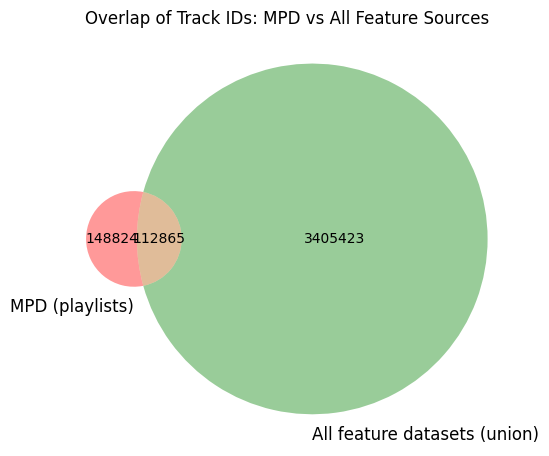

In [7]:
n_feat_union = len(ids_features_union)
intersection_union = mpd_track_ids & ids_features_union
n_inter_union = len(intersection_union)

print(f"Unique track IDs in MPD:                    {n_mpd:,}")
print(f"Unique track IDs in features UNION:         {n_feat_union:,}")
print(f"Overlap (tracks in both):                   {n_inter_union:,}")
print(f"  - % of MPD tracks covered by UNION:       {n_inter_union / n_mpd * 100:.2f}%")
print(f"  - % of UNION tracks that appear in MPD:   {n_inter_union / n_feat_union * 100:.2f}%")

plt.figure(figsize=(6, 6))
venn2(
    subsets=(
        n_mpd - n_inter_union,        # MPD only
        n_feat_union - n_inter_union, # Features only
        n_inter_union                 # Both
    ),
    set_labels=("MPD (playlists)", "All feature datasets (union)")
)
plt.title("Overlap of Track IDs: MPD vs All Feature Sources")
plt.show()
